In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10 # Also cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os

In [2]:
batch_size = 32
num_classes = 10
epochs = 20
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('X_shape', x_train.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test_samples')

x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_shape (50000, 32, 32, 3)
50000 train_samples
10000 test_samples


In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', 
                input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding = 'same'))    
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())    
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))




In [6]:
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint  = ModelCheckpoint('Cifar10_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
earlystop  = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
callbacks  = [earlystop, checkpoint, reduce_lr] 
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = 0.001), metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [7]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks, validation_data=(x_test, y_test), shuffle=True)

model.save('Cifar10.h5')
scores  = model.evaluate(x_test, y_test, verbose=1)
print('Test loss ', scores[0])
print('Test Accuracy ', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 260s 5ms/step - loss: 1.5309 - accuracy: 0.4454 - val_loss: 1.2866 - val_accuracy: 0.5468

Epoch 00001: val_loss improved from inf to 1.28657, saving model to Cifar10_model.h5
Epoch 2/20
50000/50000 [==============================] - 242s 5ms/step - loss: 1.1212 - accuracy: 0.6078 - val_loss: 0.9052 - val_accuracy: 0.6840

Epoch 00002: val_loss improved from 1.28657 to 0.90521, saving model to Cifar10_model.h5
Epoch 3/20
50000/50000 [==============================] - 240s 5ms/step - loss: 1.0045 - accuracy: 0.6537 - val_loss: 0.9813 - val_accuracy: 0.6713

Epoch 00003: val_loss did not improve from 0.90521
Epoch 4/20
50000/50000 [==============================] - 240s 5ms/step - loss: 0.9673 - accuracy: 0.6675 - val_loss: 0.8713 - val_accuracy: 0.7033

Epoch 00004: val_loss improved from 0.90521 to 0.87127, saving model to Cifar10_model.h5
Epoch 5/20
50000/50000 [================

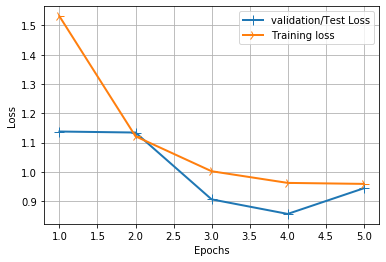

In [24]:
# Plotting accuracy and Loss Charts

import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
importrt matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32, 32, 3
model = load_model('Cifar10_model.h5')
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nb_validation_samples = 13877

y_pred = model.predict_generatovarsvalidation_generator, nb_validation_samples, batch_size + 1)
y_pred = np.argmax(y_pred, axis=1)

target_names = list(class_labels.values())
plt.figure(figsize = (8, 8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation = 'nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(ticks_marks, classes, rotation = 90)
_ = plt.yticks(ticks_marks, classes)


In [40]:
# Running some tests
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32, 32, 3
classifier = load_model('Cifar10.h5')
color = True
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height) :
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = 'airplane'
    if res == 1:
        pred = 'automobile'
    if res == 2:
        pred = 'bird'
    if res == 3:
        pred = 'cat'
    if res == 4:
        pred = 'deer'
    if res == 5:
        pred = 'dog'
    if res == 6:
        pred = 'frog'
    if res == 7:
        pred = 'horse'
    if res == 8:
        pred = 'ship'
    if res == 9 :
        pred = 'truck'
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imagel.shape[0]*2, cv2.BORDER_CONSTANT, value = BLACK)
    if color == False:
        expanded_image =  cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (0, 255, 0), 2)
    cv2.imshow(name, expanded_image)
    
for i in range(0, 10):
    rand =  np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    imagel = cv2.resize(input_im, None, fx = scale, fy = scale, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,img_row, img_height, img_depth)
    
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test('Prediction', res, imagel, scale, img_row, img_height)
    cv2.waitKey(0)
cv2.destroyAllWindows()
    